In [1]:
import numpy as np
import matplotlib.pyplot as plt
from models.analytical.trapdiffusion import TrapDiffusion, hadamard, SingleOccupationSingleIsotope
%load_ext autoreload
%autoreload 2

# Standard Trap-Diffusion Model

## Single-Occupation, Single Isotope Model

\begin{aligned}
&\begin{aligned}
\frac{d}{d t}\left(\begin{array}{c}
c_s \\
c_{t, 1} \\
c_{t, 2}
\end{array}\right) & =\left(\begin{array}{l}
1 / c^S \\
1 / c_1^T \\
1 / c_2^T
\end{array}\right) \circ \\
& \left\{\left(\begin{array}{ccc}
-\left(a_{T_1 S} c_1^T \sigma+a_{T_2 S} c_2^T \sigma\right) c^S & a_{S T_1} c_1^T & a_{S T_2} c_2^T \\
a_{T_1 S} c^S c_1^T \sigma & -a_{S T_1} c_1^T & 0 \\
a_{T_2 S} c^S c_2^T \sigma & 0 & -a_{S T_2} c_2^T
\end{array}\right)\left(\begin{array}{c}
c_s \\
c_{t, 1} \\
c_{t, 2}
\end{array}\right)\right.
\end{aligned}\\
&\left.+\left[\left(\begin{array}{c}
c_s \\
c_{t, 1} \\
c_{t, 2}
\end{array}\right) \circ\left(\begin{array}{ccc}
0 & \frac{a_{T_1 s} s^S c_1^T \sigma}{c_{t, 1}^{M a x}} & \frac{a_{T_2 s} s^S c_2^T \sigma}{c_{t, 2}^{M a x}} \\
-\frac{a_{T_1 s} c^s c_1^T \sigma}{c_{t, 1}^{M a x}} & 0 & 0 \\
-\frac{a_{T_2 s} c^T c_2^T \sigma}{c_{t, 2}^{M a x}} & 0 & 0
\end{array}\right)\left(\begin{array}{c}
c_s \\
c_{t, 1} \\
c_{t, 2}
\end{array}\right)\right]\right\}
\end{aligned}

$$
\begin{equation}
\frac{d}{d t} \vec{c}_{s, t}=\left(\frac{1}{\vec{c}^{ S / T}}\right) \circ\left[\underline{\underline{\mathbf{A}}} \vec{c}_{s, t}+\vec{c}_{s, t} \circ \underline{\underline{\mathbf{B}}} \vec{c}_{S, t}\right] .
\end{equation}
$$

$$
\begin{equation}
\underline{\underline{\mathbf{A}}}=\underline{\underline{\tilde{A}}} \underline{\underline{\mathbf{C}}}=\left(\begin{array}{ccc}
-\left(a_{T_1 S} c_1^T \sigma+a_{T_2 S} c_2^T \sigma\right) & a_{S T_1} & a_{S T_2} \\
a_{T_1 S} c_1^T \sigma & -a_{S T_1} & 0 \\
a_{T_2} s c_2^T \sigma & 0 & -a_{S T_2}
\end{array}\right)\left(\begin{array}{ccc}
c^S & 0 & 0 \\
0 & c_1^T & 0 \\
0 & 0 & c_2^T
\end{array}\right)
\end{equation}
$$

- $c_{t,i}$ : concentration of hydrogen trapped in trap of type i
- $c_j^T$ : concentration of traps of type j
- $c_{s}$ : concentration of solute hydrogen in non-trap (solute) sites
- $c^S$ : concentration of solute sites
- $a_{i\leftarrow j}$ : transition rate from j to i, typically in matrix notation in row i and columnn j
- $c_{t,i}^{Max} $ : the upper limit (maximum) of the hydrogen concentration which can be trapped in a trap of type i (capacity limit of trap)
- $\sigma$ : capture cross-section of a trap-site

## TODO

solute in steady state auf 0
-> outflow aus den traps

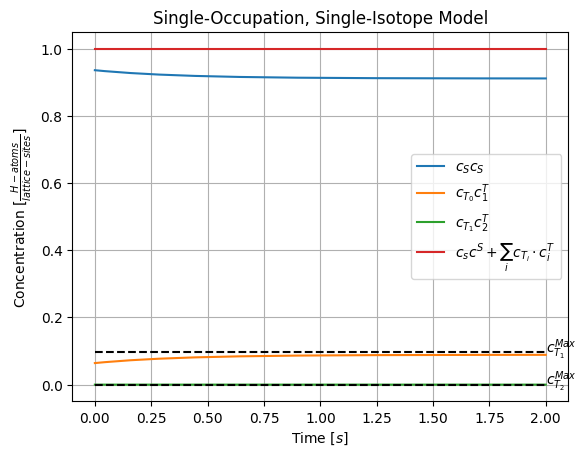

In [39]:
np.random.seed(1)
s = SingleOccupationSingleIsotope(2)
s.plot()

## Single-Occupation, Multiple Isotope Model

In [ ]:
class SingleOccupationMultipleIsotope(TrapDiffusion):
    def __init__(self, n_traps = 2, n_isotopes = 2):
        TrapDiffusion.__init__(self, "Single-Occupation, Multiple-Isotope Model")
        # concentraion of trap sites and solute sites.
        # c_S_T = [c_S, c_T_1, c_T_2, ...]

        self.c_S_T = np.random.random(n_traps + 1)
        self.c_S_T = self.c_S_T / np.sum(self.c_S_T)
        c_S = self.c_S_T[0]

        # site concentration matrix
        self.C = np.diag(self.c_S_T)

        # max trap conentration, has to be greater than current concentration
        self.c_Max = np.random.random(n_traps)
        self.c_Max = self.c_Max * 0.5

        # capture cross-section of trap-site
        self.sigma = 1

        # base transition rates
        self.a = np.random.random((n_traps+1,n_traps+1))

        # transition rate matrix
        # trap to trap terms on the diagonal, (0,0) will be overwritten
        self.A_tilde = np.diag(-self.a[0,:])

        # solute's losses (0,0)
        # sigma is constant for all traps at the moment, so can be factored out
        self.A_tilde[0,0] = -self.sigma * np.sum(self.a[1:,0] * self.c_S_T[1:])
        
        # trap's gains from solute (first column)
        self.A_tilde[1:,0] = self.a[1:,0] * self.c_S_T[1:] * self.sigma

        # solutes gain from traps (first row)
        self.A_tilde[0,1:] = self.a[0,1:]

        self.A = self.A_tilde @ self.C

        self.B = np.zeros((n_traps+1,n_traps+1))

        # first row
        self.B[0,1:] = self.a[1:,0] * self.c_S_T[1:] * c_S * self.sigma / self.c_Max
        # fill in anty-symmetric part
        self.B[:, 0] = -self.B[0,:]


        # random start concentrations
        self.c = np.random.random((n_traps+1)*n_isotopes)
        for i in range(n_isotopes):
            self.c[i*(n_traps+1)] = 
        self.c[1:] *=self.c_Max/n_isotopes
        self.c[0] = 1 - np.sum(self.c[1:]) 

    def rhs(self,c,t):
        return hadamard(1/self.c_S_T, self.A@c + hadamard(c,self.B@c))

    def jacobian(self,c,t):
        return hadamard(1/self.c_S_T, self.A + self.B@c + hadamard(c,self.B))
    
    @property
    def vector_description(self):
        desc = {
            0: "$c_S$",
        }
        for i in range(1, len(self.c)):
            desc[i] = f"$c_{{T_{i-1}}}$"
        return desc
    
    def plot_details(self):
        for i, cm in enumerate(self.c_Max):
            plt.hlines([cm], 0, self.ts[-1], linestyles = "dashed", color = "black")
            plt.text(self.ts[-1], cm, f"$c^{{Max}}_{{t,{i+1}}}$")


# Mulit-Occupation, Single Isotope Model

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
from functools import partial
from models.analytical.trapdiffusion import hadamard
import matplotlib.pyplot as plt

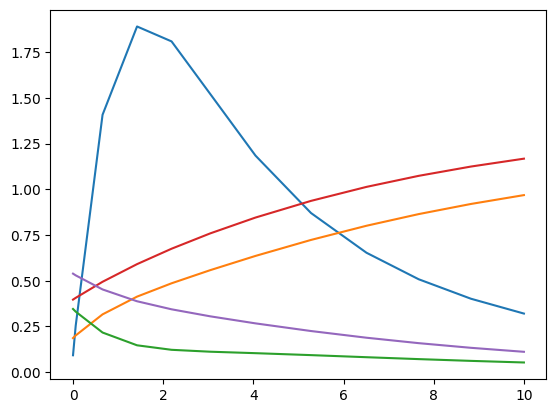

In [18]:
r = partial(np.random.uniform, 0, 1)
np.random.seed(1)
gamma = 1
sigma = 1
T_to_S = np.random.uniform(0,1,4)
T_to_S[0] = 0
cS = r()

c0 = np.random.uniform(0,1,5) # = [c_S, c^T_0, c^T_1, c^T_2, c^T_3], # now trap concentrations change

E = np.identity(5)
E[0,0] = 0
E[0,1:] = -np.arange(0,4) / cS

A = np.zeros((5,5))
A[1,2] = T_to_S[1] # T1 to S
A[2,2] = - T_to_S[1] # - T1 to S
A[2,3] = T_to_S[2] # T2 to S
A[3,3] = - T_to_S[2] # - T2 to S
A[3,4] = T_to_S[3] # T3 to S
A[4,4] = - T_to_S[3] # - T3 to S

H = np.zeros((5,5))
H[1,1] = -1
H[2,2] = -1
H[3,3] = -1
H[2,1] = 1
H[3,2] = 1
H[4,3] = 1

g = gamma * T_to_S * sigma * cS
M = np.zeros((5,5))
M[1:,0] = g

def rhs(t,c):
    return E @ (A@c + hadamard(H@c, M@c))

def jac(t,c):
    return E@(A + hadamard(H,M@c) + hadamard(H@c, M))

sol = solve_ivp(rhs, (0,10), c0)
plt.plot(sol.t, sol.y.T)
plt.show()

# Multi-Occupation, Multiple Isotope Model

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from models.analytical.trapdiffusion import hadamard
import matplotlib.pyplot as plt

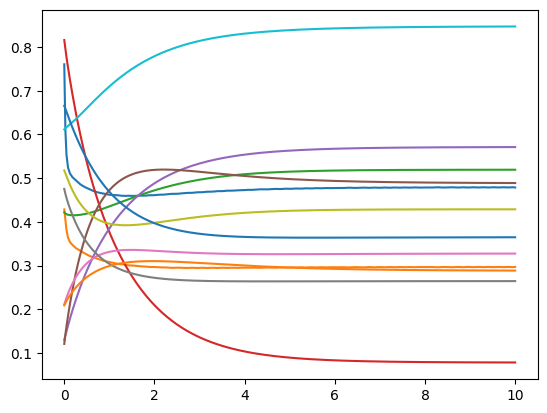

In [11]:
# c0 = [c_H, c_D, c_T_00, c_T_10, c_T_01, c_T_20, c_T_11, c_T_02, c_T_30, c_T_21, c_T_12, c_T_03]
c0 = np.random.uniform(0,1,12)
cS = np.random.uniform(0,1)
T_to_S = np.random.uniform(0,1,9)

TS = {
    '10' : T_to_S[0],
    '01' : T_to_S[1],
    '20' : T_to_S[2],
    '11' : T_to_S[3],
    '02' : T_to_S[4],
    '30' : T_to_S[5],
    '21' : T_to_S[6],
    '12' : T_to_S[7],
    '03' : T_to_S[8],
}

E = np.identity(12)
E[0,0] = 0
E[1,1] = 0

E[0,3] = -1/cS
E[0,5] = -2/cS
E[0,6] = -1/cS
E[0,8] = -3/cS
E[0,9] = -2/cS
E[0,10] = -1/cS

E[1,4] = -1/cS
E[1,6] = -1/cS
E[1,7] = -2/cS
E[1,9] = -1/cS
E[1,10] = -2/cS
E[1,11] = -3/cS

A = np.zeros((2,12,12))
A[0, 2, 3] = TS['10']
A[0, 3, 3] = -TS['10']
A[0,3,5] = TS['20']
A[0,5,5] = -TS['20']
A[0,4,6] = TS['11']
A[0,6,6] = -TS['11']
A[0,5,8] = TS['30']
A[0,8,8] = -TS['30']
A[0,6,9] = TS['21']
A[0,9,9] = -TS['21']
A[0,7,10] = TS['12']
A[0,10,10] = -TS['12']

A[1,2,4] = TS['01']
A[1,3,4] = -TS['01']
A[1,3,6] = TS['11']
A[1,6,6] = -TS['11']
A[1,4,7] = TS['02']
A[1,7,7] = -TS['02']
A[1,5,9] = TS['21']
A[1,9,9] = -TS['21']
A[1,6,10] = TS['12']
A[1,10,10] = -TS['12']
A[1,7,11] = TS['03']
A[1,11,11] = -TS['03']

H = np.zeros((2,12,12))
e = 0.5
d = 0.5
H[0,2,2] = -1
H[0,3,3] = -1
H[0,4,4] = -1
H[0,5,5] = -1
H[0,6,6] = -1
H[0,7,7] = -1

H[0,3,2] = 1
H[0,5,3] = 1
H[0,6,4] = 1
H[0,8,5] = 1
H[0,9,6] = 1
H[0,10,7] = 1

H[0,8,9] = e
H[0,9,9] = -e
H[0,10,10] = -e
H[0,11,11] = -e

H[0,8,9] = e
H[0,9,10] = e
H[0,10,11] = e

H[1,2,2] = -1
H[1,3,3] = -1
H[1,4,4] = -1
H[1,5,5] = -1
H[1,6,6] = -1
H[1,7,7] = -1

H[1,4,2] = 1
H[1,6,3] = 1
H[1,7,4] = 1
H[1,9,5] = 1
H[1,10,6] = 1
H[1,11,7] = 1

H[1,8,8] = -d
H[1,9,9] = -d
H[1,10,10] = -d

H[1,9,8] = d
H[1,10,9] = d
H[1,11,10] = d


M = np.zeros((2,12,12))
g = 1
M[0,1:,0] = g
M[1,1:,1] = g

def rhs(t,c):
    return E @ (A[0]@c + A[1]@c + hadamard(H[0]@c, M[0]@c) + hadamard(H[1]@c, M[1]@c))

def jac(t,c):
    return E@(A[0] + A[1] + hadamard(H[0],M[0]@c) + hadamard(H[1],M[1]@c) + hadamard(H[0]@c, M[0]) + hadamard(H[1]@c, M[1]))

sol = solve_ivp(rhs, (0,10), c0)
plt.plot(sol.t, sol.y.T)

## Now with realistic values

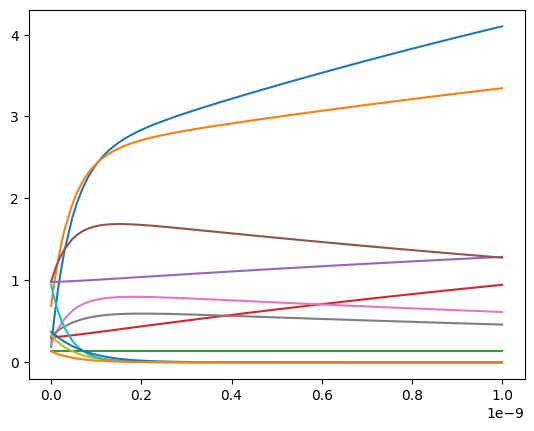

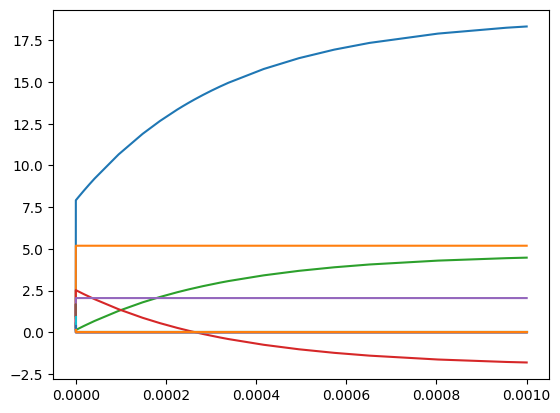

In [24]:

# A_mat_iso +++++++++++++++++++++++++++++++++++++++++++++++++++
#                      !first isotope
#                      cell%a_iso_mat =0.d0
#                      cell%a_iso_mat(1,3,4) = 3022.8272984145406  !first isotope
#                      cell%a_iso_mat(1,4,6) = 347725598.62135780
#                      cell%a_iso_mat(1,5,7) = 173862799.31067890
#                      cell%a_iso_mat(1,6,9) = 20133797667.950905
#                      cell%a_iso_mat(1,7,10)= 13422531778.633938
#                      cell%a_iso_mat(1,8,11)= 6711265889.3169689
#                      DO k=1,size(cell%a_iso_mat,3)
#                         cell%a_iso_mat(1,k,k)=-sum(cell%a_iso_mat(1,:,k)) !balance matrix column-wise : sum-column=0
#                      ENDDO
# Dann für das zweite Isotop :
#                      !second isotope
#                      cell%a_iso_mat(2,3,5) = 3022.8272984145406
#                      cell%a_iso_mat(2,4,7) = 173862799.31067890
#                      cell%a_iso_mat(2,5,8) = 347725598.62135780
#                      cell%a_iso_mat(2,6,10)= 6711265889.3169689
#                      cell%a_iso_mat(2,7,11)= 13422531778.633938
#                      cell%a_iso_mat(2,8,12)= 20133797667.95090


# c0 = [c_H, c_D, c_T_00, c_T_10, c_T_01, c_T_20, c_T_11, c_T_02, c_T_30, c_T_21, c_T_12, c_T_03]
c0 = np.random.uniform(0,1,12)
cS = np.random.uniform(0,1)
T_to_S = np.array(
    [
    3022.8272984145406, # T10
    3022.8272984145406, # T01
    347725598.62135780, # T20
    173862799.31067890, # T11
    347725598.62135780, # T02
    20133797667.950905, # T30
    13422531778.633938, # T21
    6711265889.3169689, # T12
    20133797667.95090, # T03
    ]
    )
e = 536918980.06994247
d = 379659051.75522107
g = 1

TS = {
    '10' : T_to_S[0],
    '01' : T_to_S[1],
    '20' : T_to_S[2],
    '11' : T_to_S[3],
    '02' : T_to_S[4],
    '30' : T_to_S[5],
    '21' : T_to_S[6],
    '12' : T_to_S[7],
    '03' : T_to_S[8],
}

E = np.identity(12)
E[0,0] = 0
E[1,1] = 0

E[0,3] = -1/cS
E[0,5] = -2/cS
E[0,6] = -1/cS
E[0,8] = -3/cS
E[0,9] = -2/cS
E[0,10] = -1/cS

E[1,4] = -1/cS
E[1,6] = -1/cS
E[1,7] = -2/cS
E[1,9] = -1/cS
E[1,10] = -2/cS
E[1,11] = -3/cS

A = np.zeros((2,12,12))
A[0, 2, 3] = TS['10']
A[0, 3, 3] = -TS['10']
A[0,3,5] = TS['20']
A[0,5,5] = -TS['20']
A[0,4,6] = TS['11']
A[0,6,6] = -TS['11']
A[0,5,8] = TS['30']
A[0,8,8] = -TS['30']
A[0,6,9] = TS['21']
A[0,9,9] = -TS['21']
A[0,7,10] = TS['12']
A[0,10,10] = -TS['12']

A[1,2,4] = TS['01']
A[1,3,4] = -TS['01']
A[1,3,6] = TS['11']
A[1,6,6] = -TS['11']
A[1,4,7] = TS['02']
A[1,7,7] = -TS['02']
A[1,5,9] = TS['21']
A[1,9,9] = -TS['21']
A[1,6,10] = TS['12']
A[1,10,10] = -TS['12']
A[1,7,11] = TS['03']
A[1,11,11] = -TS['03']

H = np.zeros((2,12,12))
H[0,2,2] = -1
H[0,3,3] = -1
H[0,4,4] = -1
H[0,5,5] = -1
H[0,6,6] = -1
H[0,7,7] = -1

H[0,3,2] = 1
H[0,5,3] = 1
H[0,6,4] = 1
H[0,8,5] = 1
H[0,9,6] = 1
H[0,10,7] = 1

H[0,8,9] = e
H[0,9,9] = -e
H[0,10,10] = -e
H[0,11,11] = -e

H[0,8,9] = e
H[0,9,10] = e
H[0,10,11] = e

H[1,2,2] = -1
H[1,3,3] = -1
H[1,4,4] = -1
H[1,5,5] = -1
H[1,6,6] = -1
H[1,7,7] = -1

H[1,4,2] = 1
H[1,6,3] = 1
H[1,7,4] = 1
H[1,9,5] = 1
H[1,10,6] = 1
H[1,11,7] = 1

H[1,8,8] = -d
H[1,9,9] = -d
H[1,10,10] = -d

H[1,9,8] = d
H[1,10,9] = d
H[1,11,10] = d


M = np.zeros((2,12,12))
M[0,1:,0] = g
M[1,1:,1] = g

def rhs(t,c):
    return E @ (A[0]@c + A[1]@c + hadamard(H[0]@c, M[0]@c) + hadamard(H[1]@c, M[1]@c))

def jac(t,c):
    return E@(A[0] + A[1] + hadamard(H[0],M[0]@c) + hadamard(H[1],M[1]@c) + hadamard(H[0]@c, M[0]) + hadamard(H[1]@c, M[1]))

sol = solve_ivp(rhs, (0,1e-9), c0, jac = jac, method="BDF")
plt.plot(sol.t, sol.y.T)
plt.show()
sol = solve_ivp(rhs, (0,1), c0, jac = jac, method="BDF")
plt.plot(sol.t, sol.y.T)

In [25]:
%matplotlib qt5

In [29]:
sol = solve_ivp(rhs, (0,0.02), c0, jac = jac, method="BDF")
plt.plot(sol.t, sol.y.T)